In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.linear_model import LogisticRegression
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
data = pd.read_csv('data/train.csv').drop(['Id'], axis = 1)
# test = pd.read_csv('data/test.csv')

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# train columns
data.columns



Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
low_price_limit = data.SalePrice.quantile(0.33)
mid_price_limit = data.SalePrice.quantile(0.67)

(low_price_limit, mid_price_limit)

(139000.0, 191000.0)

In [6]:
data['PriceRangeInt'] = 1
data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2
data['PriceRangeInt']

C:\Users\Christian\AppData\Local\Temp\ipykernel_16668\716762574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
C:\Users\Christian\AppData\Local\Temp\ipykernel_16668\716762574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2


0       2
1       1
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: PriceRangeInt, Length: 1460, dtype: int64

In [7]:
CUANTITATIVES = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


predictors_1 = CUANTITATIVES #['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual']
data[predictors_1]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,OverallQual,OverallCond,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,7,5,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,6,8,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,7,5,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,7,5,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,8,5,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,6,5,0,953,953,953,...,2,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,6,6,163,589,1542,2073,...,2,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,7,9,0,877,1152,1188,...,1,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,5,6,1029,0,1078,1078,...,1,240,366,0,112,0,0,0,0,142125


<AxesSubplot:>

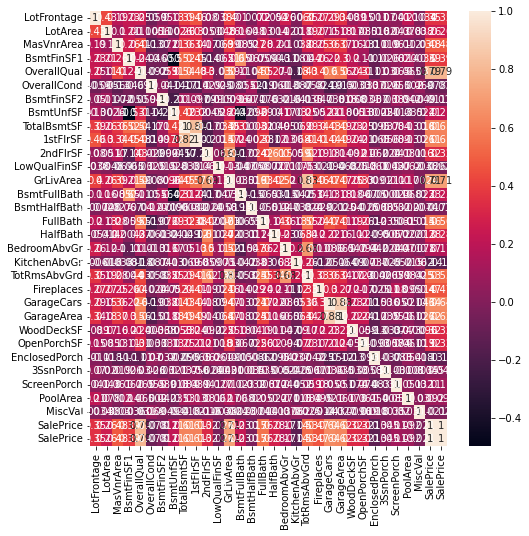

In [8]:
plt.subplots(figsize = (8,8))
sns.heatmap(data[predictors_1 + ['SalePrice']].corr(), xticklabels=data[predictors_1 + ['SalePrice']].corr().columns, yticklabels=data[predictors_1 + ['SalePrice']].corr().columns, annot=True)


In [9]:
# Data con variables
data_vars = data[predictors_1 + ['SalePrice'] + ['PriceRangeInt']]

data_vars = data_vars.dropna()
data_vars.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual',
       'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'SalePrice', 'PriceRangeInt'],
      dtype='object')

In [10]:
y = data_vars.pop('PriceRangeInt') #La variable respuesta
X = data_vars #El resto de los datos
random.seed(123)

In [11]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

#### Modelo Regresion logistica

In [12]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)

C:\Users\Christian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar buen precio\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar buen precio
 [[ 87  23   2]
 [ 40  46  36]
 [  5   4 116]]
Accuracy:  0.6935933147632312


#### Modelo 2

In [14]:
predictors_2 = ['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual'] #['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual']
# data[predictors_1]
data[predictors_2]

,GrLivArea,GarageCars,TotalBsmtSF,OverallQual
0,1710,2,856,7
1,1262,2,1262,6
2,1786,2,920,7
3,1717,3,756,7
4,2198,3,1145,8
...,...,...,...,...
1455,1647,2,953,6
1456,2073,2,1542,6
1457,2340,1,1152,7
1458,1078,1,1078,5


<AxesSubplot:>

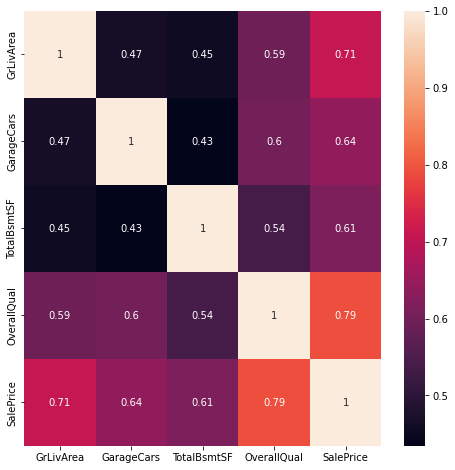

In [15]:
plt.subplots(figsize = (8,8))
sns.heatmap(data[predictors_2 + ['SalePrice']].corr(), xticklabels=data[predictors_2 + ['SalePrice']].corr().columns, yticklabels=data[predictors_2 + ['SalePrice']].corr().columns, annot=True)


In [16]:
# Data con variables
data_vars2 = data[predictors_2 + ['SalePrice'] + ['PriceRangeInt']]

data_vars2 = data_vars2.dropna()
data_vars2.columns

Index(['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual', 'SalePrice',
       'PriceRangeInt'],
      dtype='object')

In [17]:
y = data_vars2.pop('PriceRangeInt') #La variable respuesta
X = data_vars2 #El resto de los datos
random.seed(123)

In [18]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [19]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)

In [20]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar buen precio\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar buen precio
 [[ 50  98   2]
 [ 15 105  30]
 [  1   5 132]]
Accuracy:  0.6552511415525114


#### Modelo 3

In [21]:
predictors_3 = ['OverallQual']
data[predictors_3]

,OverallQual
0,7
1,6
2,7
3,7
4,8
...,...
1455,6
1456,6
1457,7
1458,5


<AxesSubplot:>

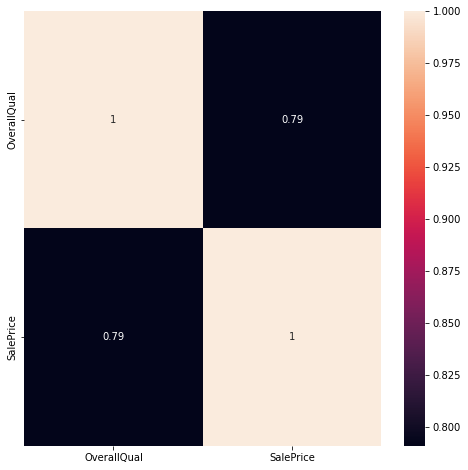

In [22]:
plt.subplots(figsize = (8,8))
sns.heatmap(data[predictors_3 + ['SalePrice']].corr(), xticklabels=data[predictors_3 + ['SalePrice']].corr().columns, yticklabels=data[predictors_3 + ['SalePrice']].corr().columns, annot=True)


In [23]:
data_vars3 = data[predictors_3 + ['SalePrice'] + ['PriceRangeInt']]

data_vars3 = data_vars3.dropna()
data_vars3.columns

Index(['OverallQual', 'SalePrice', 'PriceRangeInt'], dtype='object')

In [24]:
y = data_vars3.pop('PriceRangeInt') #La variable respuesta
X = data_vars3 #El resto de los datos
random.seed(123)

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [26]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)

In [27]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar buen precio\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar buen precio
 [[  0 133   5]
 [  0 107  47]
 [  0  14 132]]
Accuracy:  0.545662100456621
